In [1]:
from utils.nn_utils import plot_history, save_history, load_history

2025-09-26 15:53:53.185574: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-26 15:53:53.187727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-26 15:53:53.217044: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-26 15:53:53.217072: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-26 15:53:53.217109: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
import matplotlib.pyplot as plt

def plot_train_val_performance(history, save_path=None):
    """
    Plots training and validation loss and accuracy from a Keras history dictionary.

    Args:
        history (dict): Dictionary containing 'loss', 'val_loss', 'accuracy', 'val_accuracy'.
        save_path (str, optional): If provided, saves the figure to this path.
    """
    final_train_acc = history['accuracy'][-1]
    final_val_acc = history['val_accuracy'][-1]
    final_train_loss = history['loss'][-1]
    final_val_loss = history['val_loss'][-1]

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.annotate(f'Final Train Loss: {final_train_loss:.4f}\nFinal Val Loss: {final_val_loss:.4f}', 
             xy=(0.5, 0.5), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'),
             horizontalalignment='left', verticalalignment='center')
    print("Final Training and Validation Loss:")
    print(final_train_loss, final_val_loss)

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.annotate(f'Final Train Acc: {final_train_acc:.4f}\nFinal Val Acc: {final_val_acc:.4f}', 
             xy=(0.5, 0.5), xycoords='axes fraction', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'),
             horizontalalignment='left', verticalalignment='center')
    
    print("Final Training and Validation Accuracy:")
    print(final_train_acc, final_val_acc)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

Final Training and Validation Loss:
0.05498266965150833 0.09455464035272598
Final Training and Validation Accuracy:
0.9962407350540161 0.9828333258628845


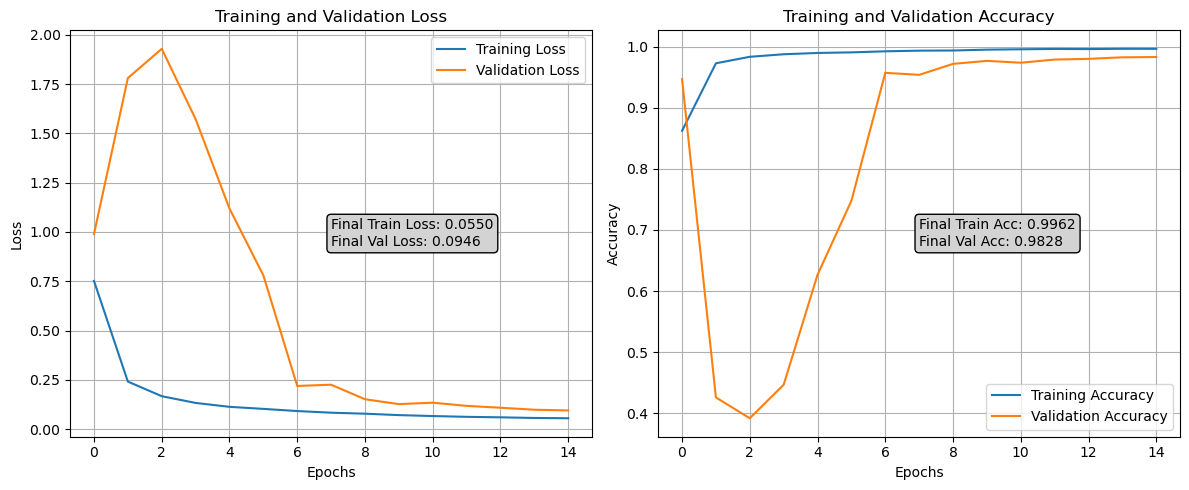

In [3]:
baseline_hist_p = load_history('history/baseline_cnn_pruned.history')
plot_train_val_performance(baseline_hist_p, save_path='figures/train/baseline_cnn_pruned_performance.png')

Final Training and Validation Loss:
0.07341156154870987 0.11673759669065475
Final Training and Validation Accuracy:
0.9944815039634705 0.9796666502952576


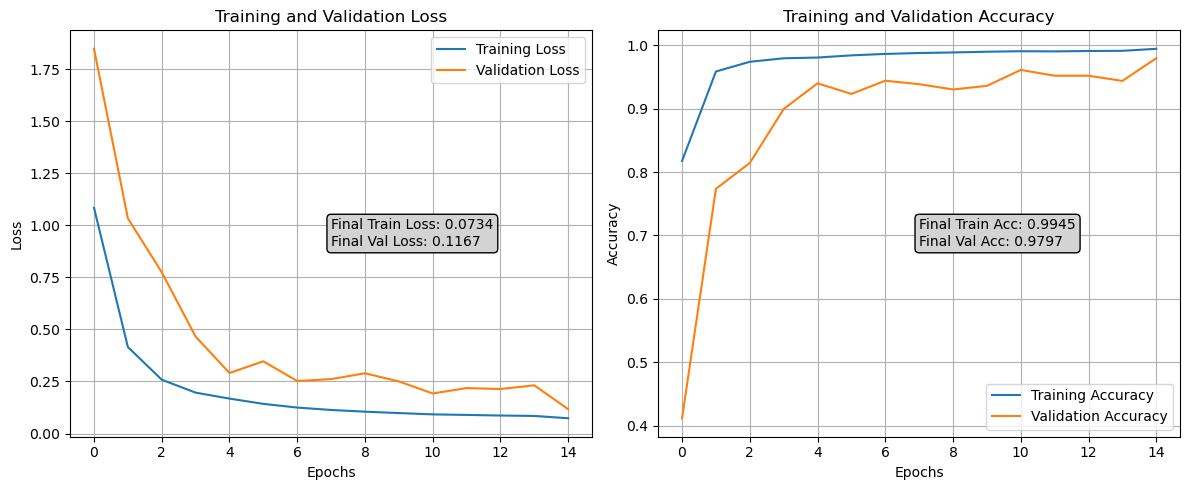

In [4]:
quantized_hist_p = load_history('history/quantized_cnn_pruned.history')
plot_train_val_performance(quantized_hist_p, save_path='figures/train/quantized_cnn_pruned_performance.png')

In [5]:
# Load Mnist Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [19]:
# Make 3D plots rotatable in Jupyter
def enable_interactive_matplotlib():
    # Try the ipympl backend first (JupyterLab/Notebook)
    try:
        import ipywidgets  # noqa: F401
        import matplotlib
        # If running inside Jupyter, this will activate the widget backend
        get_ipython().run_line_magic("matplotlib", "widget")
        return "widget"
    except Exception:
        pass

    # Fallback to the older interactive notebook backend
    try:
        get_ipython().run_line_magic("matplotlib", "notebook")
        return "notebook"
    except Exception:
        pass

    # Final fallback: inline (static). Rotation won’t work here.
    try:
        get_ipython().run_line_magic("matplotlib", "inline")
    except Exception:
        pass
    return "inline"


def plot_3d_image(image):
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D)

    # Ensure interactive backend if possible
    enable_interactive_matplotlib()

    # mirror the image for better 3D visualization
    image = np.flipud(image)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # x, y are pixel coordinates; z is intensity
    y = np.arange(image.shape[0])
    x = np.arange(image.shape[1])
    X, Y = np.meshgrid(x, y)
    Z = image.squeeze()

    # Plot the surface with heat map on z axis
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    ax.set_title('3D Surface Plot of Image Intensity')

    ax.set_xlabel('Pixel X')
    ax.set_ylabel('Pixel Y')
    ax.set_zlabel('Intensity')
    plt.show()


In [17]:
enable_interactive_matplotlib()

'widget'

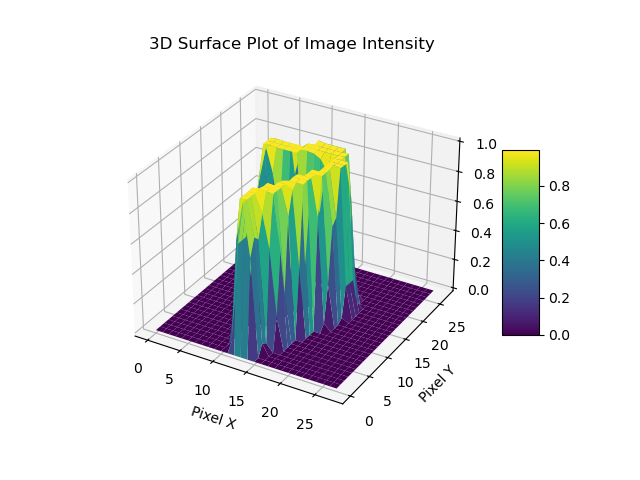

In [22]:
# pull a random image and plot it
random_index = np.random.randint(0, x_train.shape[0])
random_image = x_train[random_index]
plot_3d_image(random_image)

In [9]:
#load the svhn dataset
import tensorflow as tf
import tensorflow_datasets as tfds

# --- Load SVHN dataset ---
ds_train, info = tfds.load("svhn_cropped", split="train", with_info=True, as_supervised=True)
ds_test  = tfds.load("svhn_cropped", split="test", as_supervised=True)

n_classes   = 10
input_shape = (32, 32, 3)

# RAM-friendly settings
batch_size   = 1024
shuffle_buf  = 2048
prefetch_buf = 1
num_calls    = 2


def post_batch_preprocess(images_u8, labels_any):
    # --- Labels: int32 cast + remap digit '10' → '0' ---
    labels = tf.cast(labels_any, tf.int32)
    labels = tf.where(
        tf.equal(labels, tf.constant(10, dtype=tf.int32)),
        tf.constant(0, dtype=tf.int32),
        labels
    )
    labels = tf.one_hot(labels, n_classes, dtype=tf.float16)

    # --- Images: normalize to [0,1] ---
    images = tf.cast(images_u8, tf.float16) / 255.0
    return images, labels

# --- Training data (full train set, shuffled) ---
train_data = (
    ds_train
    .shuffle(shuffle_buf)
    .batch(batch_size, drop_remainder=False)
    .map(post_batch_preprocess, num_parallel_calls=num_calls)
    .prefetch(prefetch_buf)
)